## **Data Pre-Processing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Task 1.*** Before starting work with any dataset, we must:
- download dataset;
- display basic statistical information on numerical variables;
- derive the dimension of the dataset;
- check the types of variables and the amount of data for each variable.

In [2]:
t = pd.read_csv('titanic.csv')
t.describe() #display basic statisctical information on numerical variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
'''shape of dataset (number of columns and rows),
size of the datase (the number of elements)'''
print(t.shape, t.size)

(891, 12) 10692


In [ ]:
t.dtypes #check the types of variables

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
t.count() #amount of data for each variable

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

***Task 2.*** Determine the number of missing values ​​for each attribute

In [ ]:
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusions**: As can be seen from the output, the Cabin attribute contains an incredibly large number of missing values ​​- 687 missing rows out of a total of 891 rows. For this reason, we can consider this attribute irrelevant in advance, since we can learn little from it. If there were several hundred fewer missing values, then we could try to find out the floor on which the cabin was located, and from this see which floor had the most survivors. However, in our case this will not be possible due to too many Nan values. In Embarked, only 2 values ​​are missing, which in no way interferes with statistical analysis. Next is the Age attribute with the number of 177 missing. This is not a critically large amount given the total volume of rows, so this variable, although relevant by default, can be actively used for statistical purposes, the main thing will be to fill in the missing values, for example, with the median by gender (Sex).

***Task 3:*** Build a correlation matrix

1. Calculate correlation coefficients for a set of data using the Pearson method
2. Display the obtained matrix of coefficients in the form of a heat map
3. Describe the obtained results based on the values ​​of the correlation coefficients

In [ ]:
corr_pears_coef = t.corr(method='pearson') #Pearson correlation coefficients
corr_pears_coef

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


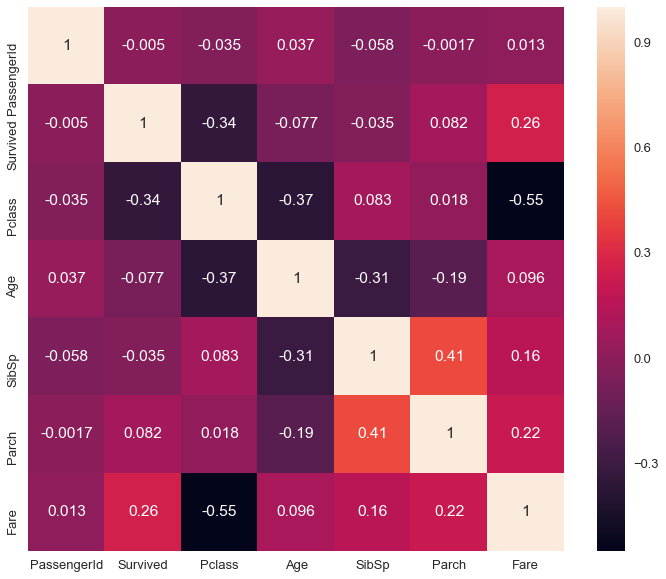

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
heatmap_plot = sns.heatmap(corr_pears_coef, annot=True)
heatmap_plot

In [ ]:
#heatmap_plot = sns.heatmap(corr_pears_coef, center=0, cmap='gist_ncar')

**Conclusions**: Based on this matrix and heat map, we see that the greatest dependence is between the Fare and Pclass attributes - the more prestigious the class, the more money you need to pay to get there (-0.54, average correlation). Next is the correlation between Age and Pclass (correlation -0.34 - the more prestigious the class, the greater the age), between Parch and SibSp (correlation 0.41), between Pclass and Survived (-0.33, if the class is more prestigious, then there is a greater chance of survival). There is very little correlation between other attributes.

**Task 4:** There are quite a lot of missing values ​​in our dataset, in particular in the passenger age attribute. Working with such data affects both the modeling result and the overall picture of the data. So, in order to get rid of gaps, we will use the filling of missing values ​​with the median by groups.
Write a function that takes as input a dataframe, the name of a column with missing values ​​and a list of grouping columns and returns a dataframe with filled missing values
Give an example of how the function works and check for missing values ​​(see task 2)



In [ ]:
a = t.columns[5]
listgroup = list()
listgroup.append(t['Sex'])

def na_evanesco(t, a, listgroup):
    medians = t.groupby('Sex', as_index = False).aggregate({'Age': 'median'})
    for i in range (t.Sex.count()):
        if t.Age.isnull().iloc[i] == True:
            if t.Sex[i] == medians.Sex[0]:
                t.Age[i] = medians.Age.iloc[0]
            elif t.Sex[i] == medians.Sex[1]:
                t.Age[i] = medians.Age.iloc[1]
    return t

In [ ]:
t = na_evanesco(t, a, listgroup)
t

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
t.isna().sum() #test on null variables

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusions:** The most logical solution was to initially fill in the missing values ​​of the Age attribute, because so far it is the most relevant of all with missing values. It seemed to me that the most correct option was to fill in the empty Age cells in the grouping with the Sex attribute, depending on gender. First, median ages for men and women were calculated separately. Next, going through all the lines of the dataset (in this case, counting the lines of the Sex attribute), we look, if this Age element is empty, then we look at its Sex attribute value - if it is 'female', then we pass the value of the median over female, and if it is 'male' is the value of the median by male. As a result, we return the changed dataset. When checking for empty values, you can see that there are no empty values ​​left in the Age attribute. Regarding filling empty Cabin values, it has already been determined that this attribute is irrelevant, and its type prevents the calculation of the median. The only good way is to replace the missing values ​​with some of the values ​​​​of the registered cabins, but this will not bring any benefit in any case. As for Embarked, I’ll wait with this one, since for now its values ​​are not numeric (which will be corrected in task 9, there we’ll talk about filling in its two missing values ​​with a median).

***Task 5:*** In machine technology models there is still a great problem of processing continuous changes. It is necessary to convert the continuous values ​​into categorical ones.
The maximum passenger life is 80 years.
So, let's divide the range from 0 to 80 into 5 midpoints.
Add a new Age_bin column to our dataset, which will contain values ​​of 0, 1, 2, 3, 4 skin age groups.
Try a graph that shows the number of survivors in each skin category.



In [ ]:
t.insert(6, "Age_bin", 1000) #added column, ar first with first value 1000
for i in range (t.Age.count()):
        if t.Age[i] <= 80:
            if t.Age[i] <64:
                if t.Age[i] <48:
                    if t.Age[i] <32:
                        if t.Age[i] <16: t.Age_bin[i] = 0
                        else: t.Age_bin[i] = 1
                    else: t.Age_bin[i] = 2
                else: t.Age_bin[i] = 3
            else: t.Age_bin[i] = 4

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

In [ ]:
# Alternate variant
a = list()
for i in range (t.Age.count()):
        if t.Age[i] <= 80:
            if t.Age[i] <64:
                if t.Age[i] <48:
                    if t.Age[i] <32:
                        if t.Age[i] <16: a.append(0)
                        else: a.append(1)
                    else: a.append(2)
                else: a.append(3)
            else: a.append(4)
t['Age_bin'] = a

In [ ]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_bin,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,2,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,3,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,1,0,237736,30.0708,NaN,C


In [ ]:
# Testing
for i in range (t.Age.count()):
        if t.Age[i] == 74:
            print(t.Age[i], t.Age_bin[i])

74.0 4


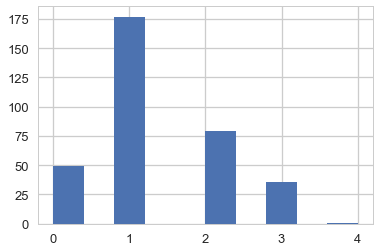

In [ ]:
# Plot for amount of survivers in every age category
t.loc[(t['Survived'] == 1), 'Age_bin'].hist()

**Conclussions**: In this case, it seemed to me easiest to define the Age_bin groups with a regular conditional operator, the if else construction. The check shows that the values ​​in the groups were distributed correctly. For clarity,

category 0: 0-15 years;

category 1: 16-31 years;

category 2: 32-47 years old;

category 3: 48-63 years old;

category 4: 64-80 years old.

Most importantly, now that age is categorized, it is much easier for us to look at the survival data output on the graph. We see that most of the obleys survived from category 1, aged 16-31 years. The fewest survivors are in category 4. Thus, in this case, the categorization was justified and made this graph much more visual than it otherwise would have been.

***Task 6:*** Since the fare variable is also continuous, it must be coded to an ordinal scale. For this, use the pandas.qcut function. pandas.qcut
- it is necessary to check whether the hypothesis that the number of surviving passengers differs for the quartile values ​​of the fare variable is correct, and whether it is appropriate to use coding for this variable (for further work with the coded feature)

In [3]:
t['Fare_bin'] = pd.qcut(t['Fare'], 4,labels=range(0,4))
t.groupby(['Fare_bin', 'Survived']).aggregate({'Survived': 'count'})

Survived
Fare_bin Survived          
0        0              179
         1               44
1        0              156
         1               68
2        0              121
         1              101
3        0               93
         1              129

**Conclusions:** The same case as with Age_bin, in this case the categorization was very justified. In this case, however, we divided into 4 groups of approximately equal size. As a result, we see that we have 4 categories: in the 0th category, people paid the least for a trip on the Titanic, in the 3rd category, gigantic sums were paid for the cruise. Based on the number of survivors, it becomes obvious to us that the chances of survival increased from the cost of the tariff. The more the passenger paid, the higher the chances that he will survive.

***Task 7:*** New variables Family_size and Alone need to be created and analyzed. The Family_size variable conveys the sum of the Parch and SibSp variables. The Family_size variable will display the combined data needed to test the hypothesis that passenger survival depends on the number of family members. The Alone variable indicates available families.

In [ ]:
t['Family_size'] = t[['Parch','SibSp']].sum(axis=1)
t['Alone'] = np.where(t['Family_size']== 0, True, False)
t

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_bin,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,A/5 21171,7.2500,NaN,S,0,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,0,PC 17599,71.2833,C85,C,3,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,1,0,113803,53.1000,C123,S,3,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,2,0,0,373450,8.0500,NaN,S,1,0,True
5,6,0,3,"Moran, Mr. James",male,29.0,1,0,0,330877,8.4583,NaN,Q,1,0,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,3,0,0,17463,51.8625,E46,S,3,0,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,0,3,1,349909,21.0750,NaN,S,2,4,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1,0,2,347742,11.1333,NaN,S,1,2,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,1,0,237736,30.0708,NaN,C,2,1,False


In [ ]:
t.groupby(['Family_size', 'Survived']).aggregate({'Survived': 'count'})

Survived
Family_size Survived          
0           0              374
            1              163
1           0               72
            1               89
2           0               43
            1               59
3           0                8
            1               21
4           0               12
            1                3
5           0               19
            1                3
6           0                8
            1                4
7           0                6
10          0                7

**Conclussions:** From the results above we can see that if a person was alone, without a family, then the probability of survival decreases, as well as when the number of family members is 4 or more. But with the number of relatives from 1 to 3, the chances of survival increase slightly, but still insignificantly. As a conclusion, we can say that the hypothesis about the dependence of the survival of passengers on the number of members of their family is confirmed, but in fact the influence in numbers does not seem to be large at all.

***Task 8:*** Remove attributes that are **NOT** relevant or remove many missing values..

In [ ]:
t.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

,Survived,Pclass,Sex,Age,Age_bin,SibSp,Parch,Fare,Embarked,Fare_bin,Family_size,Alone
0,0,3,male,22.0,1,1,0,7.2500,S,0,1,False
1,1,1,female,38.0,2,1,0,71.2833,C,3,1,False
2,1,3,female,26.0,1,0,0,7.9250,S,1,0,True
3,1,1,female,35.0,2,1,0,53.1000,S,3,1,False
4,0,3,male,35.0,2,0,0,8.0500,S,1,0,True
5,0,3,male,29.0,1,0,0,8.4583,Q,1,0,True
6,0,1,male,54.0,3,0,0,51.8625,S,3,0,True
7,0,3,male,2.0,0,3,1,21.0750,S,2,4,False
8,1,3,female,27.0,1,0,2,11.1333,S,1,2,False
9,1,2,female,14.0,0,1,0,30.0708,C,2,1,False


**Conclussions:** I decided to remove the attributes 'PassengerId', 'Name', 'Ticket', 'Cabin', as I considered them irrelevant. With Cabin everything is clear, as already mentioned, due to too many missing values ​​and even the impossibility of replacing them with the median, this attribute is unnecessary and does not affect anything. Name also does not affect statistical studies, since it is not a numeric value, and to determine the “importance” of a passenger, we have a variable Pclass, indicating in what class the passenger traveled, therefore, his position in society and wealth. The Ticket attribute also does not provide any significant information. This is only confirmation that the passenger was not a free rider; it is akin to some kind of identifier. PassengerId also does not affect anything, because it is itself an identifier, a serial number of a row in the dataset.

***Task 9:*** Convert the Sex, Embarked, and Title variables to numeric values.


In [ ]:
t = t.replace(to_replace =["S", "C", "Q", "female", "male"], value =["0", "1", "2", "0", "1"])
t

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_bin,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,1,0,A/5 21171,7.2500,NaN,0,0,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,2,1,0,PC 17599,71.2833,C85,1,3,1,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,2,1,0,113803,53.1000,C123,0,3,1,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,2,0,0,373450,8.0500,NaN,0,1,0,True
5,6,0,3,"Moran, Mr. James",1,29.0,1,0,0,330877,8.4583,NaN,2,1,0,True
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,3,0,0,17463,51.8625,E46,0,3,0,True
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,0,3,1,349909,21.0750,NaN,0,2,4,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,1,0,2,347742,11.1333,NaN,0,1,2,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,0,1,0,237736,30.0708,NaN,1,2,1,False


In [ ]:
# Filling null values of Embarked with median of the column
#t.loc[t['Embarked'].isna(), 'Embarked'] = t.loc[(t['Embarked'].notna()), 'Embarked'].mode()
t.Embarked.fillna(t.Embarked.mode()[0], inplace = True)
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Age_bin          0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Fare_bin         0
Family_size      0
Alone            0
dtype: int64

**Conclusions:** The Sex and Embarked attributes can be quite important for statistical studies of a given dataset, so for ease of working with them, their values, now represented symbolically, should be encoded and turned into numbers. Thus, we will be able to perform operations on their values ​​as on numbers, which will make our work easier. However, there is no Title attribute in the dataset; perhaps there was a typo in the task, so the process was carried out only on the Sex and Embarked attributes. We also filled in the empty values ​​of the Embarked attribute, since now that its values ​​are numeric, this is much easier to do by calculating the mode and substituting it.

***Task 10.*** Create graphs of all categorical variables and analyze how many skin categories are included in the data

1.   highlight categorical variables
2.   build a grid of plots of the number of observations in each category



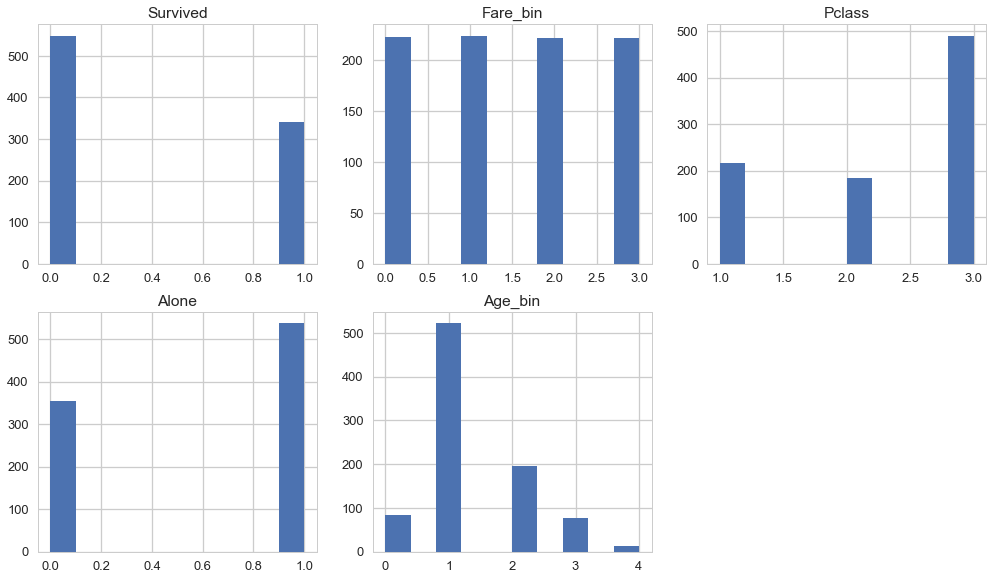

In [ ]:
#Categorical atributes: survived, fare_bin, pclass, alone, age_bin, embarked, sex
grids = plt.figure(figsize=(17, 15))
x_surv = grids.add_subplot(331)
x_surv.set_title('Survived')
x_surv.hist(t['Survived'])

x_fb = grids.add_subplot(332)
x_fb.set_title('Fare_bin')
x_fb.hist(t['Fare_bin'])

x_pclass = grids.add_subplot(333)
x_pclass.set_title('Pclass')
x_pclass.hist(t['Pclass'])

x_alone = grids.add_subplot(334)
x_alone.set_title('Alone')
x_alone.hist(t['Alone'])

x_ab = grids.add_subplot(335)
x_ab.set_title('Age_bin')
x_ab.hist(t['Age_bin'])

plt.show()

In [ ]:
alive = t.loc[(t['Survived'] == 1), 'Age'].count()
deceased = t.loc[(t['Survived'] == 0), 'Age'].count()

zero = t.loc[(t['Fare_bin'] == 0), 'Age'].count()
one = t.loc[(t['Fare_bin'] == 1), 'Age'].count()
two = t.loc[(t['Fare_bin'] == 2), 'Age'].count()
three = t.loc[(t['Fare_bin'] == 3), 'Age'].count()

p1 =  t.loc[(t['Pclass'] == 1), 'Age'].count()
p2 =  t.loc[(t['Pclass'] == 2), 'Age'].count()
p3 =  t.loc[(t['Pclass'] == 3), 'Age'].count()

alone_no = t.loc[(t['Alone'] == 0), 'Age'].count()
alone_yes = t.loc[(t['Alone'] == 1), 'Age'].count()

gr0 = t.loc[(t['Age_bin'] == 0), 'Age'].count()
gr1 = t.loc[(t['Age_bin'] == 1), 'Age'].count()
gr2 = t.loc[(t['Age_bin'] == 2), 'Age'].count()
gr3 = t.loc[(t['Age_bin'] == 3), 'Age'].count()
gr4 = t.loc[(t['Age_bin'] == 4), 'Age'].count()
print("Атрибут Survived, категория Выжившие:",alive, ". Категория Погибшие:", deceased,"\n",
     "Атрибут Fare_bin, категория 0:",zero, ". Категория 1:", one, ". Категория 2:", two, ". Категория 3:", three, "\n",
     "Атрибут Pclass, категория 1:",p1, ". Категория 2:",p2, ". Категория 3:", p3,"\n",
     "Атрибут Alone, категория С семьей:",alone_no, ". Категория Без семьи:", alone_yes,"\n",
     "Атрибут Age_bin, категория 0:",gr0, ". Категория 1:",gr1, ". Категория 2:", gr2, ". Категория 3:",gr3, ". Категория 3:",gr4,"\n")

Атрибут Survived, категория Выжившие: 342 . Категория Погибшие: 549 
 Атрибут Fare_bin, категория 0: 223 . Категория 1: 224 . Категория 2: 222 . Категория 3: 222 
 Атрибут Pclass, категория 1: 216 . Категория 2: 184 . Категория 3: 491 
 Атрибут Alone, категория С семьей: 354 . Категория Без семьи: 537 
 Атрибут Age_bin, категория 0: 83 . Категория 1: 522 . Категория 2: 197 . Категория 3: 76 . Категория 3: 13 



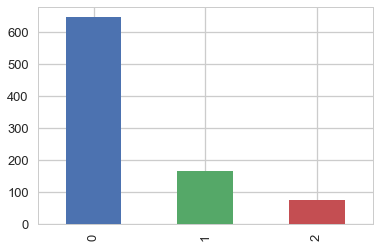

In [ ]:
t['Embarked'].value_counts().plot(kind='bar')

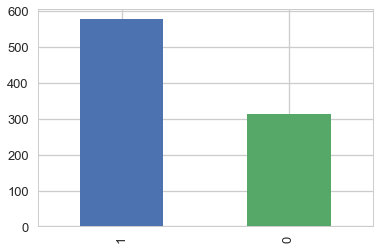

In [ ]:
t['Sex'].value_counts().plot(kind='bar')

**Conclusions:** As we can see from the graphs, categorization makes the graphs incredibly easy to read. We immediately see the number of elements in each category and can quickly form an opinion about the issue displayed on the graph, whereas without categories this is visually difficult to do. For example, the graph by gender of passengers immediately shows that there were almost twice as many men on board as women.

***Task 11.*** Construct distribution diagrams of all numerical variables

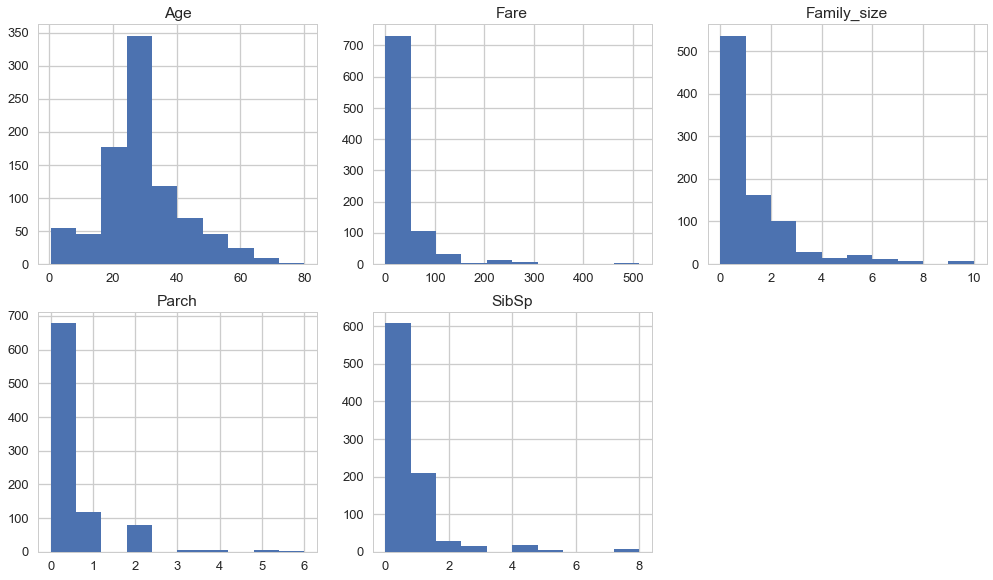

In [ ]:
grids2 = plt.figure(figsize=(17, 15))
x_age = grids2.add_subplot(331)
x_age.set_title('Age')
x_age.hist(t['Age'])

x_fare = grids2.add_subplot(332)
x_fare.set_title('Fare')
x_fare.hist(t['Fare'])

x_fs = grids2.add_subplot(333)
x_fs.set_title('Family_size')
x_fs.hist(t['Family_size'])

x_parch = grids2.add_subplot(334)
x_parch.set_title('Parch')
x_parch.hist(t['Parch'])

x_ss = grids2.add_subplot(335)
x_ss.set_title('SibSp')
x_ss.hist(t['SibSp'])

plt.show()

**Conclusions**: These diagrams help us visualize the attribute data and therefore simplify the task of perception. For example, in the age chart, we can observe that the most people on the ship were between the ages of about 25 and 30. In the Fare chart, we can clearly see the highest and lowest prices that passengers paid. The Family_size chart allows us to understand that most passengers traveled alone or with one family member. The SibSp graph shows that, for the most part, people traveled with no or minimal siblings. The same goes for the Parch chart.

##Correlation between all numerical variables
  
***Task 12.*** In some cases, visualization of the relationship between variables (numerical, categorical) makes it possible to see outliers in variables and find hidden trends and even highlight additional variables. Therefore, it is necessary:

1) plot graphs of the relationship between all numerical variables.

2) describe the obtained ratios and suggest how they can (or cannot) be used

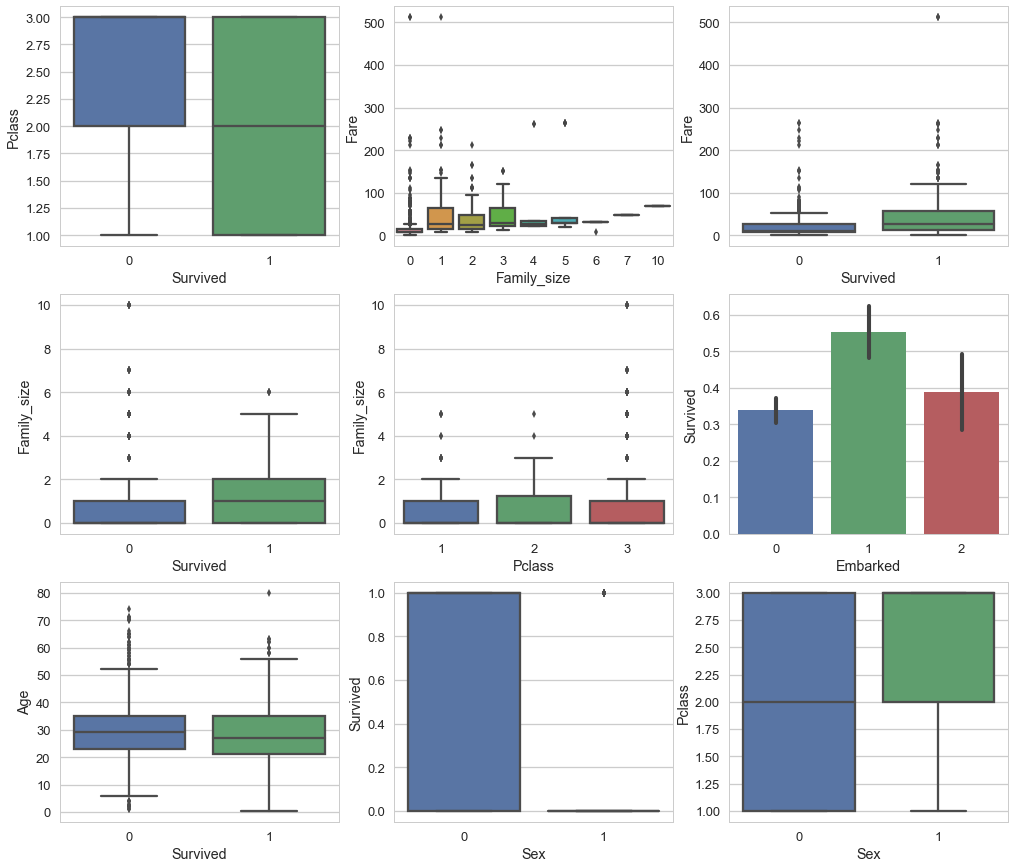

In [ ]:
#Numerical атрибуты: pclass, survived, age, sex, age_bin, fare, fare_bin, family_size, parch и sibsp
fig, axes = plt.subplots(3, 3, figsize=(17, 15))

sns.boxplot(ax = axes[0,0], data=t,x='Survived',y='Pclass')

sns.boxplot(ax = axes[0,1], data=t, x='Family_size',y='Fare')

sns.boxplot(ax = axes[0,2], data=t,x='Survived',y='Fare')

sns.boxplot(ax = axes[1,0], data=t,x='Survived',y='Family_size')

sns.boxplot(ax = axes[1,1], data=t,x='Pclass',y='Family_size')

sns.barplot(ax = axes[1,2], data=t,x='Embarked', y='Survived')

sns.boxplot(ax = axes[2,0], data=t,x='Survived',y='Age')

sns.boxplot(ax = axes[2,1], data=t,x='Sex',y='Survived')

sns.boxplot(ax = axes[2,2], data=t,x='Sex',y='Pclass')

**Conclussions:** Some categorical attributes in this dataset are also numeric, so they are also used in this task. In the first graph we see how belonging to the classes on the ship affected the survival of passengers - here we do not see significant emissions, but taking into account that the number of deaths of the 2nd and 1st classes is much less than that of the 3rd, we see that survival rate directly depended on the class of the passenger, therefore on how much he paid for the cruise (the more the passenger paid, the higher the chance that he would get a place on a lifeboat). In the second graph we see indirect confirmation of this - the influence of the number of family members on the cost of the cruise indicates why we see so many deaths from 4 or more family members in the fourth graph. Also in graph two we see outliers - unexpectedly, people with 4 and 5 family members fall into approximately the second class, taking into account the price they paid (judging by the statistics, perhaps this is why such a Family_size figure (4 or 5) is a sharp transition in the chances of survival). At the same time, in chart number three, we check exactly how the price affected survival and see a clear outlier - the theory is confirmed, and indeed the outlier in survival among those who paid the maximum amount proves the survival/1-2_class probability system. It was people with 4 to 5 family members who could afford to stay in 1st or 2nd class, and, as we found out above, this greatly influenced the chances of their survival. Again, in graph five we see confirmation of all of the above - we see outliers in the third class (10 family members, of course, a small chance of survival) and the number of family members in the 1st and 2nd breaks off at a maximum of 5. For graph six it was not possible to construct a boxplot, so I decided to make at least a barplot, on which we see that the landing site somehow affected survival, because it is clear that the majority of survivors were those who landed at point 1, then those who landed at 2 and already the minimum percentage of survival for those stranded at point 0. I can count that there are some outliers, but they do not change the overall picture. Next, on graph seven, we draw a connection between survival and age - surprisingly, the number of survivors and deaths is approximately the same in the middle-aged group from 20 to 35 years old, and there are expected mortality rates for people of older age (from 50 years old, although there are also small outliers in survival rate for people in this age group, most likely they belonged to 1st or 2nd class, because, given their age, they could belong to respected passengers who have the opportunity to pay more for a cruise), but there is also an unexpected outlier in survival - survival of one maximum age person on a ship. The following graphs are not of much use, but out of curiosity I decided to check them - maybe I’ll find something interesting. In graph eight, I compared mortality by gender and was surprised to see that many more women survived than men - only there was a clear outlier in the survival of the stronger sex (I thought that the number of survivors for men and women should be approximately the same). I decided to check what exactly this could be connected with, and looked at the classes on the ship by gender on graph nine and again was surprised by the conclusions - apparently, there were generally more women on the Titanic than men, because we see them a greater number in all classes, and men prevailed in the 3rd and 2nd classes (although, of course, in the 1st class we see their increase). From this we can conclude that there are more women among the survivors, because there were more of them in the 1st class, and that outlier in the survival rate of men is, for the most part, the increase in men from graph nine. The only thing that bothers me is such a difference in numbers, especially in the first class, which makes me think why such a difference exists at all. True, this will no longer give our research any benefit. Or, probably, I simply could have made a mistake in the construction and therefore got such results (however, I hope that there are no serious errors).